# Proyecto 04 - Proyecto de final de Carrera

Estudiante: Mónica Lorena Ortiz Medina


**Consigna**

1. Elige tu punto de partida entre dos opciones:

*   Proyectos 01 y 02
*   Proyecto 03

*Se elige el Proyecto 03 y a continuación se encuentra en su forma original al entregado y aprobado:* 

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

********************************


**Volviendo a la consigna**

2. Formula una nueva pregunta, problema o desafío para explorar. 

**Nuevo Desafío: Incorporar la clasificación con las 3 estrellas**

*Justificación:* Dentro de las conclusiones del proyecto 3 se expresa que trasladar el problema a uno categórico binario llevaba a tener mejores resultados de los algoritmos aplicados, sin embargo, tenía que excluirse la categoría intermedia para lograrlo. En este proyecto se buscará mejorar el análisis y el modelo para convertir el modelo en uno de 3 categorías: "positivo", "ni satisfecho ni insatisfecho" / "neutro", "negativo". 

En suma se realizará: 

1. Mejoras en la generalización de las palabras a partir de un **nuevo modelo de machine learning**. 

2. Uso completo de la información del problema de clasificación, es decir, incluir las 5 estrellas en 3 categorías, al menos. 





Importamos las librerías requeridas y las bases de datos ya normalizadas: 

Recordatorio del procedimiento de normalización: La idea en el proyecto anterior era generar un modelo que logre predecir la puntuación de un review. Para lograr una facilidad en la generalización, se normalizan los textos, es decir que solo se extraen las palabras más importantes, eliminando stopwords por ejemplo, y a continuación si se incorpora en el algoritmo de clasificación. Para ello se usa la librería spacy donde se tokeniza y lemmatiza. 

A manera de recordatorio la función que permite hacer esto es la siguiente: 

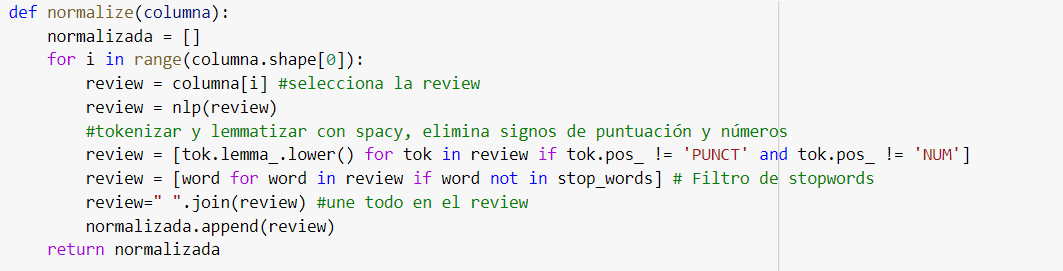

Se importan las librerías requeridas:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import spacy
from sklearn.feature_extraction.text import CountVectorizer


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeClassifier

import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix,f1_score
from sklearn.neural_network import MLPClassifier




De los archivos con el procedimiento de normalización obtenido en el Proyecto anterior se parte para trabajar: 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DSDev_Normalized.csv to DSDev_Normalized.csv
Saving DSTest_Normalized.csv to DSTest_Normalized.csv
Saving DSTrain_Normalized.csv to DSTrain_Normalized.csv


In [ ]:
dftrain_norm = pd.read_csv("/content/DSTrain_Normalized.csv")
dftest_norm = pd.read_csv("/content/DSTest_Normalized.csv")
dfdev_norm = pd.read_csv("/content/DSDev_Normalized.csv")

Se crea ahora las bases de datos independientes para las 3 categorías:

In [ ]:
train_negativo = dftrain_norm[(dftrain_norm.stars == 1)|(dftrain_norm.stars == 2)]
train_positivo = dftrain_norm[(dftrain_norm.stars == 4)|(dftrain_norm.stars == 5)]
train_neutro = dftrain_norm[(dftrain_norm.stars == 3)]

In [ ]:
test_negativo = dftest_norm[(dftest_norm.stars == 1)|(dftest_norm.stars == 2)]
test_positivo = dftest_norm[(dftest_norm.stars == 4)|(dftest_norm.stars == 5)]
test_neutro = dftest_norm[(dftest_norm.stars == 3)]


In [ ]:
dev_negativo = dfdev_norm[(dfdev_norm.stars == 1)|(dfdev_norm.stars == 2)]
dev_positivo = dfdev_norm[(dfdev_norm.stars == 4)|(dfdev_norm.stars == 5)]
dev_neutro = dfdev_norm[(dfdev_norm.stars == 3)]

Se hace una verificación de que en el proceso no se hayan creado valores en nulo: 

In [ ]:
train_negativo.isna().sum()


Unnamed: 0    0
reviews       0
stars         0
dtype: int64

In [ ]:
train_positivo.isna().sum()

Unnamed: 0    0
reviews       0
stars         0
dtype: int64

In [ ]:
train_neutro.isna().sum()

Unnamed: 0    0
reviews       0
stars         0
dtype: int64

In [ ]:
test_negativo.isna().sum()

Unnamed: 0    0
reviews       0
stars         0
dtype: int64

In [ ]:
test_positivo.isna().sum()

Unnamed: 0    0
reviews       0
stars         0
dtype: int64

In [ ]:
test_neutro.isna().sum()


Unnamed: 0    0
reviews       0
stars         0
dtype: int64

In [ ]:
dev_negativo.isna().sum()

Unnamed: 0    0
reviews       0
stars         0
dtype: int64

In [ ]:
dev_positivo.isna().sum()

Unnamed: 0    0
reviews       0
stars         0
dtype: int64

In [ ]:
dev_neutro.isna().sum()

Unnamed: 0    0
reviews       0
stars         0
dtype: int64

Ahora, para cada base, la dummy de calificación (a pesar de que son 3 categorías se dejó el nombre de dummy por facilidad): 


1.   dummy_califica=1 si se tienen 4 o 5 estrellas (Categoría Positivo)
2.   dummy_califica=0 si se tienen 3 estrellas (Categoría Neutro)
3.   dummy_califica=2 si se tienen 1 o 2 estrellas (Categoría Negativo)



In [ ]:
train_positivo["dummy_califica"] = np.ones((len(train_positivo,)),dtype=int)
test_positivo["dummy_califica"] = np.ones((len(test_positivo,)),dtype=int)
dev_positivo["dummy_califica"] = np.ones((len(dev_positivo,)),dtype=int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
train_negativo["dummy_califica"] = 2 * np.ones((len(train_negativo,)),dtype=int)
test_negativo["dummy_califica"] = 2 * np.ones((len(test_negativo,)),dtype=int)
dev_negativo["dummy_califica"] = 2 * np.ones((len(dev_negativo,)),dtype=int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
train_neutro["dummy_califica"] = np.zeros((len(train_neutro,)),dtype=int)
test_neutro["dummy_califica"] = np.zeros((len(test_neutro,)),dtype=int)
dev_neutro["dummy_califica"] = np.zeros((len(dev_neutro,)),dtype=int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Se verifica que en cada base se haya hecho una correcta asignación:

In [ ]:
train_neutro.head()

,Unnamed: 0,reviews,stars,dummy_califica
80000,80000,bueno fundir parir movil caber bien móvil cump...,3,0
80001,80001,aparato perfecto parir verdura no cebolla no p...,3,0
80002,80002,duradero luz llegar tiempo bien ocho funcionar...,3,0
80003,80003,peor ser apagar no ser poder apagar rato consu...,3,0
80004,80004,faltar goma tapar parir ajustar bien vino goma...,3,0


In [ ]:
train_negativo.head()

,Unnamed: 0,reviews,stars,dummy_califica
0,0,television nevir bueno ser ka pantalla menos m...,1,2
1,1,dinero tirar basura comprar horrible no tener ...,1,2
2,2,solo llegar unidad obligar comprar obligar com...,1,2
3,3,producto no recibido no entrar descalificar ve...,1,2
4,4,devuelto llega tardar co tallar equivocar,1,2


In [ ]:
train_positivo.head()

,Unnamed: 0,reviews,stars,dummy_califica
120000,120000,calidad bueno pintar ver resultar,4,1
120001,120001,falta facturar entrega rápido comer siempre fa...,4,1
120002,120002,bueno bien enviar rápido,4,1
120003,120003,material duradero queda bien material duradero...,4,1
120004,120004,buena genial aunque oler pegamento,4,1


Se concatena para las 3 bases (train, test y dev) las bases creadas en el paso anterior para tener en una sola base las 3 posibles categorías: positivo, negativo o neutro

In [ ]:
train_ds = pd.concat([train_positivo, train_negativo, train_neutro])
test_ds = pd.concat([test_positivo, test_negativo, test_neutro])
dev_ds = pd.concat([dev_positivo,dev_negativo, dev_neutro])

Se observa la base de train: 

In [ ]:
train_ds.head(100)

,Unnamed: 0,reviews,stars,dummy_califica
120000,120000,calidad bueno pintar ver resultar,4,1
120001,120001,falta facturar entrega rápido comer siempre fa...,4,1
120002,120002,bueno bien enviar rápido,4,1
120003,120003,material duradero queda bien material duradero...,4,1
120004,120004,buena genial aunque oler pegamento,4,1
...,...,...,...,...
120095,120095,no ser ligero hacer función tal comer foto pesan,4,1
120096,120096,bueno comprar excelente producto nadar mas lle...,4,1
120097,120097,perfecto regalar parir niño,4,1
120098,120098,radiar pues bien poner tener radiar no ser asi...,4,1


Se valida que no se hayan creado valores nulos: 

In [ ]:
test_ds.isna().sum() 

Unnamed: 0        0
reviews           0
stars             0
dummy_califica    0
dtype: int64

Se hace una validación para la base de datos de test donde la condición debería ser coherente con el dummy_califica

In [ ]:
test_ds.loc[test_ds['stars'] > 3, 'condition'] = 1
test_ds.loc[test_ds['stars'] < 3, 'condition'] = 2
test_ds.loc[test_ds['stars'] == 3, 'condition'] = 0

test_ds.head(200)

,Unnamed: 0,reviews,stars,dummy_califica,condition
3000,3000,buena comprar bien no tener preciar excesivo o...,4,1,1.0
3001,3001,buen producto seria interesante poner punto ce...,4,1,1.0
3002,3002,bueno calidad preciar práctico fácil usar ranu...,4,1,1.0
3003,3003,prácticas bolsa permitir guardar árbol coser n...,4,1,1.0
3004,3004,ventaja cable incorporar funciona bien cargar ...,4,1,1.0
...,...,...,...,...,...
3195,3195,buena relación calidad./ preciar fácil montar ...,4,1,1.0
3196,3196,increible relación calidad preciar producto bu...,4,1,1.0
3197,3197,bien bueno tacto bueno presenciar gran alterna...,4,1,1.0
3198,3198,buen producto parir trabajo esporádico trabajo...,4,1,1.0


In [ ]:
test_ds.isna().sum()

Unnamed: 0        0
reviews           0
stars             0
dummy_califica    0
condition         0
dtype: int64

In [ ]:
dev_ds.head(100)

,Unnamed: 0,reviews,stars,dummy_califica
3000,3000,gran jugar llave robusto francamente cumplir c...,4,1
3001,3001,funcional estupenda relación calidad preciar,4,1
3002,3002,compactar cómodo comprar parir madre contento ...,4,1
3003,3003,bien estrecho vale pintura,4,1
3004,3004,nice dar estrellar aun no haber probar % día l...,4,1
...,...,...,...,...
3095,3095,genial llego fecho indicar contento preciar ca...,4,1
3096,3096,preciar llevar montón tinto parir imprimir bar...,4,1
3097,3097,producto ideal contentar producto funcionar bien,4,1
3098,3098,llaves utiles buen producto preciar ajustar nu...,4,1


In [ ]:
test_ds.isna().sum() 

Unnamed: 0        0
reviews           0
stars             0
dummy_califica    0
condition         0
dtype: int64

Se limpian las bases de datos: 

In [ ]:
train_ds.drop(["Unnamed: 0", "stars"], axis = 1, inplace=True)
test_ds.drop(["Unnamed: 0", "stars"], axis = 1, inplace=True)
dev_ds.drop(["Unnamed: 0", "stars"], axis = 1, inplace=True)

In [ ]:
train_ds.head()

,reviews,dummy_califica
120000,calidad bueno pintar ver resultar,1
120001,falta facturar entrega rápido comer siempre fa...,1
120002,bueno bien enviar rápido,1
120003,material duradero queda bien material duradero...,1
120004,buena genial aunque oler pegamento,1


In [ ]:
test_ds.head()

,reviews,dummy_califica,condition
3000,buena comprar bien no tener preciar excesivo o...,1,1.0
3001,buen producto seria interesante poner punto ce...,1,1.0
3002,bueno calidad preciar práctico fácil usar ranu...,1,1.0
3003,prácticas bolsa permitir guardar árbol coser n...,1,1.0
3004,ventaja cable incorporar funciona bien cargar ...,1,1.0


In [ ]:
dev_ds.head()

,reviews,dummy_califica
3000,gran jugar llave robusto francamente cumplir c...,1
3001,funcional estupenda relación calidad preciar,1
3002,compactar cómodo comprar parir madre contento ...,1
3003,bien estrecho vale pintura,1
3004,nice dar estrellar aun no haber probar % día l...,1


Se limpian las bases de datos: 

In [ ]:
train_ds.reset_index(inplace=True, drop=True)
test_ds.reset_index(inplace=True, drop=True)
dev_ds.reset_index(inplace=True, drop=True)

In [ ]:
train_ds.head()

,reviews,dummy_califica
0,calidad bueno pintar ver resultar,1
1,falta facturar entrega rápido comer siempre fa...,1
2,bueno bien enviar rápido,1
3,material duradero queda bien material duradero...,1
4,buena genial aunque oler pegamento,1


Dado que la máquina en la que se está trabajando el proyecto actual tiene una baja capacidad se guardan las bases de datos limpias y concatenadas con las 3 categoráis creadas de manera que facilite el trabajo posterior: 

In [ ]:
from google.colab import files
train_ds.to_csv('DSTrain_P4.csv') 
files.download('DSTrain_P4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
test_ds.to_csv('DSTest_P4.csv') 
files.download('DSTest_P4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
dev_ds.to_csv('DSDev_P4.csv') 
files.download('DSDev_P4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DSDev_P4.csv to DSDev_P4.csv
Saving DSTest_P4.csv to DSTest_P4.csv
Saving DSTrain_P4.csv to DSTrain_P4.csv


Se parte nuevamente ya con las bases limpias y normalizadas, que ya incluyen las 3 categorías: 

In [ ]:
dftrain4 = pd.read_csv("/content/DSTrain_P4.csv")
dftest4 = pd.read_csv("/content/DSTest_P4.csv")
dfdev4 = pd.read_csv("/content/DSDev_P4.csv")

In [ ]:
dftrain4.head()

,Unnamed: 0,reviews,dummy_califica
0,0,calidad bueno pintar ver resultar,1
1,1,falta facturar entrega rápido comer siempre fa...,1
2,2,bueno bien enviar rápido,1
3,3,material duradero queda bien material duradero...,1
4,4,buena genial aunque oler pegamento,1


In [ ]:
dftrain4.drop(["Unnamed: 0"], axis = 1, inplace=True)
dftest4.drop(["Unnamed: 0"], axis = 1, inplace=True)
dfdev4.drop(["Unnamed: 0"], axis = 1, inplace=True)

In [ ]:
dftrain4.head()

,reviews,dummy_califica
0,calidad bueno pintar ver resultar,1
1,falta facturar entrega rápido comer siempre fa...,1
2,bueno bien enviar rápido,1
3,material duradero queda bien material duradero...,1
4,buena genial aunque oler pegamento,1


Se vectorizan los features con un rango de 3 ngramas que del proyecto anterior conocemos que da un mejor resultado pues permite valorar mejor las expresiones compuestas.

A continuación se transforma las bases de entrenamiento, test y dev a partir de esta vectorización. 

In [ ]:
max_features=2000

cv4=CountVectorizer(max_features=max_features, ngram_range=(1,3))

train_vec4 = cv4.fit_transform(dftrain4.reviews)

In [ ]:
test_vec4 = cv4.transform(dftest4.reviews)
dev_vec4 = cv4.transform(dfdev4.reviews)

Ahora ya podemos tener nuestro x y y de train, test y dev, con nuestra variable dependiente que son las revisiones y la objetivo que son las posibles 3 categorías. 

In [ ]:
xtrain_4 = train_vec4.toarray()
xtest_4 = test_vec4.toarray()
xdev_4 = dev_vec4.toarray()
ytrain_4 = train_ds.dummy_califica
ytest_4 = test_ds.dummy_califica
ydev_4 = dev_ds.dummy_califica

**Prueba Random Forest**

Ya teniendo las 3 categorías se estima el modelo de random forest para estimar cómo le iría a la categoría neutral (=0) siendo una independiente.

In [ ]:
random_forest3 = RandomForestClassifier(random_state=0)
random_forest3.fit(xtrain_4,ytrain_4)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Como se observa a continuación el modelo es muy débil para predecir la categoría neutral, no logra generalizar de forma adecuada como si lo hace para las categorías extremas positivo=1, negativo=2

In [ ]:
print("Métrica de Precisión: ", random_forest3.score(xtest_4,ytest_4))

Métrica de Precisión:  0.7222


In [ ]:
ypred_4 = random_forest3.predict(xtest_4) 

print("Métrica de F1-Score: ",f1_score(ytest_4, ypred_4, average=None))

Métrica de F1-Score:  [0.26751592 0.79953216 0.7945269 ]


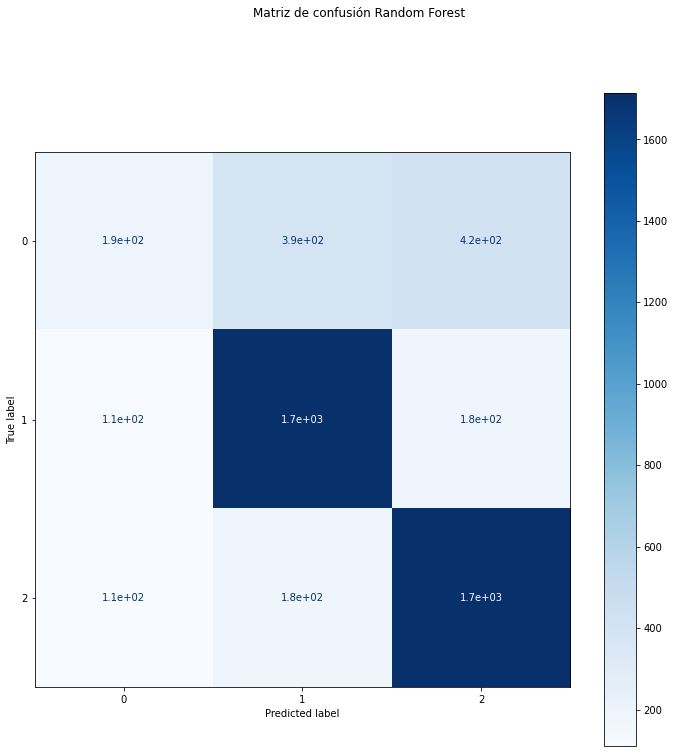

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
cm = plot_confusion_matrix(random_forest3, xtest_4, ytest_4, ax=ax, cmap=plt.cm.Blues)
fig.suptitle("Matriz de confusión Random Forest")
plt.grid(False)
plt.show()

Para probar los siguientes modelos, resulta útil hacer un reshape al array que hemos creado anteriormente para nuestro vector x que describe la vectorización de los reviews con los 3 ngramas. 

*Esto resulta de una lección aprendida tras correr los modelos, en donde python indica que este procedimiento debe realizarse para poder completar la tarea. 

In [ ]:
xtrain_4.reshape(-1, 1)
xtest_4.reshape(-1, 1)
xdev_4.reshape(-1, 1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

**Modelo 1: DNN - Deep Neural Network**

Siguiendo las recomendaciones del proyecto pasado se usan redes neuronales. 

En primer lugar usaré un clasificador de perceptrón multicapa, este modelo logra optimizar la función de pérdida usando un descenso de gradiente del tipo estocástico. 

Este algoritmo a continuación construye una red neuronal multicapa de retroalimentación que se entrena con un conjunto de datos etiquetados para realizar la clasificación en datos similares. En particular se usará una red neuronal de feedforward profunda con 5 capas ocultas de 100 nodos cada una obtenemos mejores resultados, con cada clase logrando una puntuación f1 por encima de la obtenida en Random Forest. 


Las redes neuronales artificiales consisten en varias capas de neuronas artificiales interconectadas alimentadas por funciones de activación que ayudan a encenderlas / apagarlas. Al igual que los algoritmos tradicionales de aprendizaje automático, aquí también hay ciertos valores que las redes neuronales aprenden en la fase de entrenamiento.

El modelo a continuación tiene un tipo de función de activación relu es decir que aplica la función de activación de la unidad lineal rectificada (relu por sus siglas en inglés). En este caso el alpha es el valor que gobierna la pendiente para valores inferiores al umbral.

Esta es la función más usada en deep learning. La función devuelve 0 si recibe alguna entrada negativa, pero para cualquier valor positivo x devuelve ese valor.



In [ ]:
dnn_classifier = MLPClassifier(hidden_layer_sizes = [100]*5)
dnn_classifier.fit(xtrain_4, ytrain_4)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100, 100, 100, 100, 100],
              learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=None,
              shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)

In [ ]:
dnn_predictions = dnn_classifier.predict(xtrain_4)

In [ ]:
print("Métrica de Precisión: ", dnn_classifier.score(xtest_4,ytest_4))

Métrica de Precisión:  0.683


In [ ]:
ypred_4 = dnn_classifier.predict(xtest_4) 

print("Métrica de F1-Score: ",f1_score(ytest_4, ypred_4, average=None))

Métrica de F1-Score:  [0.36083499 0.76992481 0.75837919]


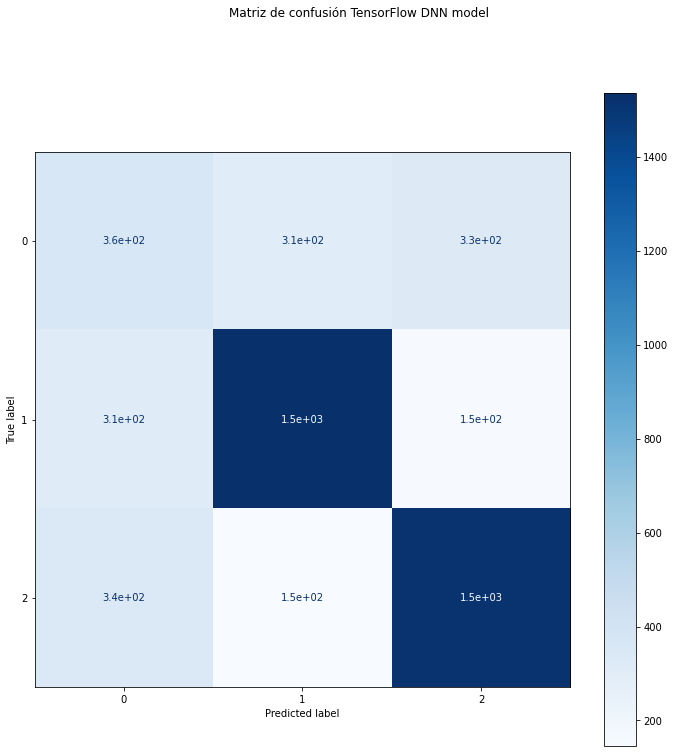

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
cm = plot_confusion_matrix(dnn_classifier, xtest_4, ytest_4, ax=ax, cmap=plt.cm.Blues)
fig.suptitle("Matriz de confusión TensorFlow DNN model")
plt.grid(False)
plt.show()

**Hallazgos**

A partir de lo encontrado el DNN model tiene una métrica de precisión más baja que la obtenida en Random Forest. Sin embargo, tiene un mejor poder para predecir la categoría intermedia. Sin embargo continúa siendo insuficiente para tener una mejor predicción para la categoría neutro. 

**Modelo 2: SNN - Neural Network**

A diferencia del anterior esta es una versión más simplificada en el cual se usan los valores por defecto del MLP Classifier. Que usa también un perceptrón multicapa. 

In [ ]:
snn_classifier = MLPClassifier()
snn_classifier.fit(xtrain_4, ytrain_4)
snn_predictions = snn_classifier.predict(xtrain_4)

In [ ]:
print("Métrica de Precisión: ", snn_classifier.score(xtest_4,ytest_4))

Métrica de Precisión:  0.6842


In [ ]:
ypred_4 = snn_classifier.predict(xtest_4) 
print("Métrica de F1-Score: ",f1_score(ytest_4, ypred_4, average=None))

Métrica de F1-Score:  [0.34843206 0.77019568 0.7670412 ]


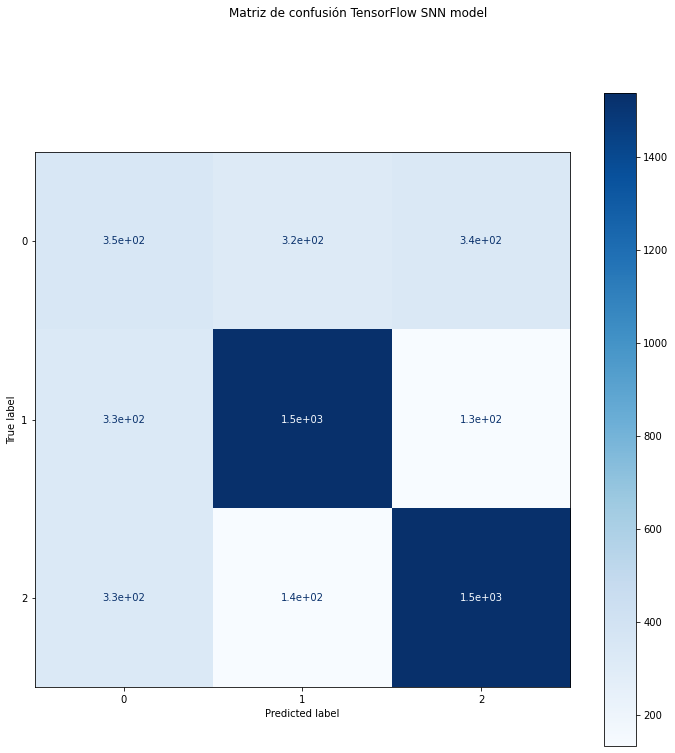

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
cm = plot_confusion_matrix(snn_classifier, xtest_4, ytest_4, ax=ax, cmap=plt.cm.Blues)
fig.suptitle("Matriz de confusión TensorFlow SNN model")
plt.grid(False)
plt.show()

**Hallazgos**

A partir de lo encontrado el DNN model tiene una métrica de precisión más baja que la obtenida en Random Forest y en DNN. Sin embargo, tiene un poder similar para predecir la categoría intermedia. No obstante continúa siendo insuficiente para tener una mejor predicción para la categoría neutro, de hecho es 0,2 más baja que la obtenida en DNN. 

**Prueba teórica de un modelo adicional**

Existe un modelo adicional que podría tener un mejor resultado, incluso con datos equilibrados y un modelo ajustado, la mayoría de los clasificadores se limitan a distinguir bien entre muchas clases más aún cuando la intermedia tiene un lenguaje mucho más complejo. 

Por lo tanto, de lo investigado se ha recomendado que si tiene muchas clases, en lugar de entrenar un solo clasificador, puede entrenar múltiples clasificadores binarios (uno para cada clase / uno frente al resto), lo que es más fácil de aprender para cada clasificador. 

A continuación se pueden combinar esas salidas binarias de los clasificadores como insumo para generar las salidas de las clases que son múltiples.

En sklearn existe una librería denominada OneVsRestClassifier (uno contra todos) que consiste en ajustar un clasificador por clase siguiendo la explicación anterior. Para cada clasificador, la clase se ajusta a todas las demás clases. 

A pesar de que la documentación indica que es más eficiente computacionalmente, al correrla el computador presentaba problemas por insuficiencia de RAM para probarlo. Se esperaba poder estimarlo dado que la documentación indica que su interpretabilidad es sencilla además de que es una de las estrategias más usadas para los problemas multiclase ya que ajusta por defecto. 

OneVsOneClassifier construye un clasificador por par de clases. En el momento de la predicción, se selecciona la clase que recibió la mayor cantidad de votos. En caso de empate (entre dos clases con el mismo número de votos), selecciona la clase con la mayor confianza de clasificación agregada sumando los niveles de confianza de clasificación por pares calculados por los clasificadores binarios subyacentes.

En conslusión se esperaba tealizar un proceso que gráficamente puede describirse de la siguiente forma: 

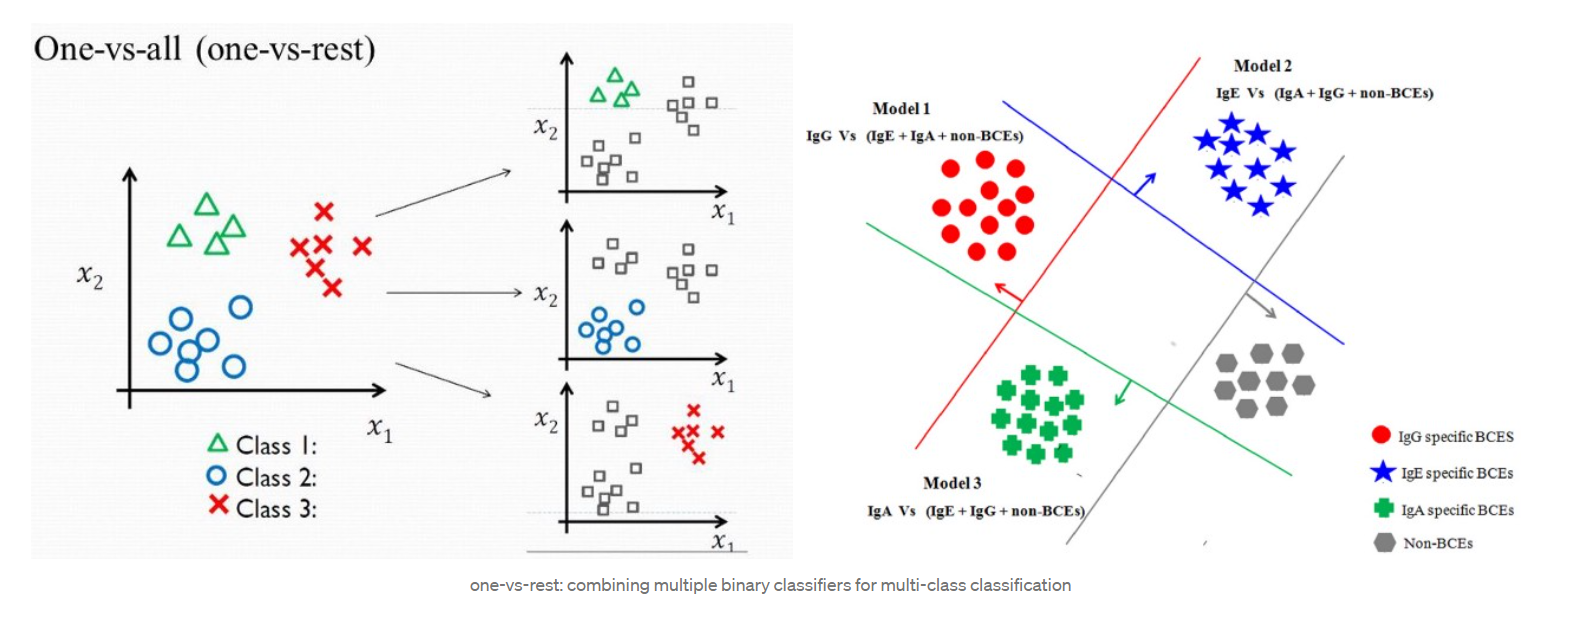



El código probado fue el siguiente: 

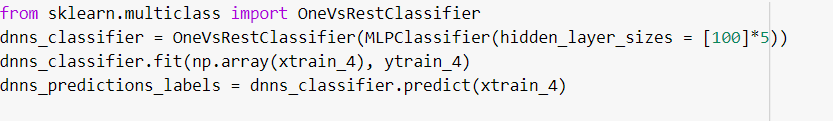

A partir de este enfoque se esperaba que la clase intermedia tuviera una mejor oportunidad de ser probada al poderse enfrentar con las extremas lo que podría segmentarla de una manera más simple haciendo que su precisión fuera más alta. 

**Otra prueba**


Una prueba adicional es usar las herramientas de optimización como Hyperop que es una librería de código abierto que permite transformaciones de preparación de datos y algoritmos de clasificación y regresión.

Tal y como se usó en el proyecto número 2, esta librería fue de gran ayuda para encontrar un algoritmo que mejor se ajustara para precedir el precio. En este caso, se esperaba poder ejecutarse con el fin de obtener un algoritmo distinto de clasificación que ejecutara la clasificación multiclase con una mejor precisión. 

Por RAM esta prueba tampoco fue posible, no obstante la investigación arroja que los mejores algoritmos de clasificación ya fueron explorados. En definitiva un mejor poder de máquina permite agildiad para seleccionar mejores hiperparámetros y enfoques para el problema multiclase. 

**Conclusiones**


**1. Vectorización de la información**

Este proceso fue clave en toda la construcción del ejercicio. Poder cambiar los ngramas para explotar mayor información de las expresiones compuestas de los reviews sobre los diferentes productos facilitó al final tener una mejor clasificación de las mismas cuando se compara con un escenario de ngramas=1.


**2. Modelos de Redes neuronales**

Los modelos de redes neuronales se muestran mucho más poderosos para un problema multiclase que un Random Forest o un Support Vector. Indistinto de la cantidad de hiperparámetros y las capas que se probaron los dos modelos, el más sencillo y el más elaborado tuvieron resultados muy similares. No obstante ambos se siguen quedando cortos para interpretar las expresiones de un estado neutral. 

Estas conclusiones se obtienen a partir de las métricas usadas para los algoritmos de clasificación que en este caso fueron F1 score y de precisión. 

La puntuación F1 es una forma de combinar la precisión y recall del modelo, y se define como la media armónica de estos dos.Por su parte la precisión es la proporción de registros positivos verdaderos entre los ejemplos que el modelo clasificó como positivos. En otras palabras, el número de verdaderos positivos dividido por el número de falsos positivos más los verdaderos positivos.

En el caso del recall es la fracción de ejemplos clasificados como positivos, entre el número total de ejemplos positivos. En otras palabras, el número de verdaderos positivos dividido por el número de verdaderos positivos más falsos negativos.

Por esta razón se usaron estas dos métricas que permiten observar la precisión del modelo como un todo y el F1 score nos permite además ver esta media armónica entre la precisión y el recall por cada categoría con el fin de analizar en cuál el modelo se está quedando corta, permitiendole al investigador explorar las causas por las cuales la generalziación del modelo tiene dificultades en hacer de manera correcta la segmentación de los datos en las multi categorías. 


**3. Capacidad del equipo para ML**

Un aspecto importante para un datascientist es contar con una máquina que disponga de una buena capacidad RAM. La baja capacidad lleva a reprocesos y horas de espera de resultados y limitaciones para probar algoritmos demandantes. 

**4. Presentación de algoritmos de forma teórica**

Ante las dificultades expuestas en la conclusión anterior, una ayuda puede ser la investigación de un modelo y dadas sus ventajas tener una hipótesis de sus efectos esperados. En el caso de este proyecto, la prueba de un modelo uno versus el resto, se espera que hubiera sido de mayor utildiad dado que abría la oportunidad de tener un análisis segmentado de cada categoría contra las otras dos en donde al final, la categoría intermedia podría tener oportunidad de mejora dado este enfoque. Por otro lado, la otra alternativa es permitir que las librerías diseñadas para optimizar parámetros puedan indagar una parametrización y un algoritmo eficiente dado el probloema de clasificación que se tiene. En este punto Hyperop podría ser poderoso además es sencillo de utilizar. 
